# Inaugural Project

## Authers
- Joachim Niemman
- Oliver Hjorhoey
- Frederik Alexander Jensen

#### Imports and set magics:

In [756]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})
from ExchangeEconomy import ExchangeEconomyClass
from scipy.optimize import minimize_scalar
from scipy import optimize
import inauguralproject
# Import your own code
from ExchangeEconomy import ExchangeEconomyClass
# Initialize the economy
economy = ExchangeEconomyClass()

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1 

This code visualizes an Edgeworth box and Pareto improvements between the two agents. We starts by defining utility functions for two agents, A and B, which reflect their preferences for two goods using parameters alpha and beta. Their initial resources and total available resources are also defined. The initial satisfaction levels (utilities) of the agents are calculated based on these endowments.

The Edgeworth box is drawn, representing the boundary of the available resources. Allocations meeting this condition are shaded in grey. The initial endowment point is marked in black.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


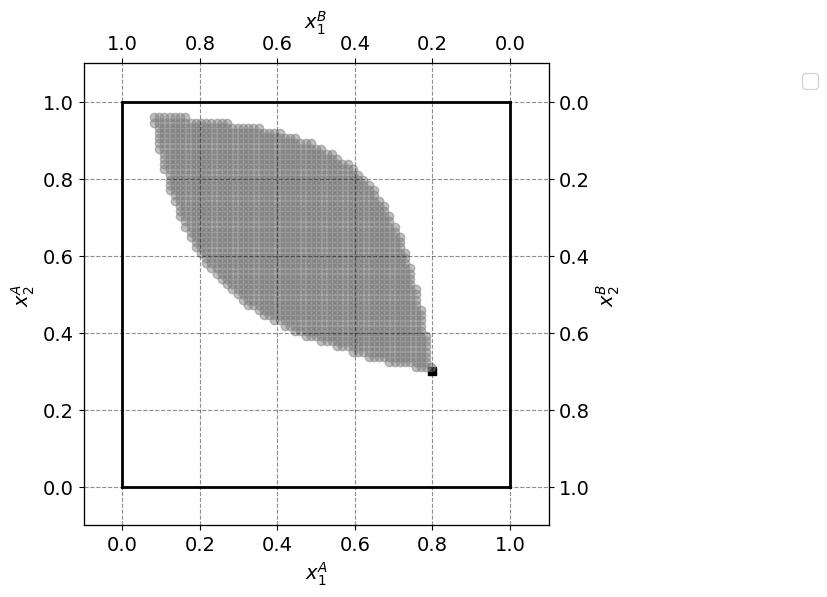

In [757]:
# Given Parameters
alpha = 1/3
beta = 2/3
omega_A1 = 0.8
omega_A2 = 0.3
w1bar = 1.0
w2bar = 1.0
N = 75  

# Utility functions
def uA(x1, x2):
    return (x1**alpha) * (x2**(1-alpha))

def uB(x1, x2):
    return (x1**beta) * (x2**(1-beta))

# Initial utility
uA_initial = uA(omega_A1, omega_A2)
uB_initial = uB(w1bar - omega_A1, w2bar - omega_A2)

# Figure plotting
fig = plt.figure(frameon=False, figsize=(6, 6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# Plotting endowment
ax_A.scatter(omega_A1, omega_A2, marker='s', color='black', )

# Plotting Edgeworth Box
ax_A.plot([0, w1bar], [0, 0], lw=2, color='black')
ax_A.plot([0, w1bar], [w2bar, w2bar], lw=2, color='black')
ax_A.plot([0, 0], [0, w2bar], lw=2, color='black')
ax_A.plot([w1bar, w1bar], [0, w2bar], lw=2, color='black')

# Calculating and plotting the Pareto improvements
x_A1 = np.linspace(0, w1bar, N)
x_A2 = np.linspace(0, w2bar, N)
X_A1, X_A2 = np.meshgrid(x_A1, x_A2)

U_A = uA(X_A1, X_A2)
U_B = uB(w1bar-X_A1, w2bar-X_A2)

pareto_improvement_mask = (U_A >= uA_initial) & (U_B >= uB_initial)

ax_A.scatter(X_A1[pareto_improvement_mask], X_A2[pareto_improvement_mask], color='grey', alpha=0.5, )

# Adjusting limits and showing plot
ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True, bbox_to_anchor=(1.6, 1.0))
plt.show()

# Question 2

In [758]:
# Given parameters and initial endowments

omega_B1 = 1 - omega_A1
omega_B2 = 1 - omega_A2
p2 = 1  # Numeraire

In [759]:

#  price range for p1
N = 75
p1_range = np.linspace(0.5, 2.5, N)

# Demand functions 
def demand_A(p1, omega_A1, omega_A2, alpha, p2=1):
    xA1 = alpha * (omega_A1 * p1 + omega_A2 * p2) / p1
    xA2 = (1 - alpha) * (omega_A1 * p1 + omega_A2 * p2) / p2
    return xA1, xA2

def demand_B(p1, omega_B1, omega_B2, beta, p2=1):
    xB1 = beta * (omega_B1 * p1 + omega_B2 * p2) / p1
    xB2 = (1 - beta) * (omega_B1 * p1 + omega_B2 * p2) / p2
    return xB1, xB2

# Calculation of the errors 
errors = np.zeros((N, 2))
for i, p1 in enumerate(p1_range):
    xA1, xA2 = demand_A(p1, omega_A1, omega_A2, alpha)
    xB1, xB2 = demand_B(p1, omega_B1, omega_B2, beta)
    
    epsilon1 = xA1 + xB1 - (omega_A1 + omega_B1)
    epsilon2 = xA2 + xB2 - (omega_A2 + omega_B2)
    
    errors[i] = [epsilon1, epsilon2]


print(errors[:1])

[[ 0.53333333 -0.26666667]]


# Question 3

In [760]:
# Demand functions for both consumers A and B for goods 1 and 2
def demand_A1(p1, omega_A1=omega_A1, omega_A2=omega_A2, alpha=alpha):
    return alpha * ((p1 * omega_A1 + p2 * omega_A2) / p1)

def demand_A2(p1, omega_A1=omega_A1, omega_A2=omega_A2, alpha=alpha):
    return (1 - alpha) * ((p1 * omega_A1 + p2 * omega_A2) / p2)

def demand_B1(p1, omega_A1=omega_A1, beta=beta):
    omega_B1 = 1 - omega_A1
    omega_B2 = 1 - omega_A2  
    return beta * ((p1 * omega_B1 + p2 * omega_B2) / p1)

def demand_B2(p1, omega_A1=omega_A1, beta=beta):
    omega_B1 = 1 - omega_A1
    omega_B2 = 1 - omega_A2 
    return (1 - beta) * ((p1 * omega_B1 + p2 * omega_B2) / p2)

# Market clearing condition errors calculation
def market_clearing_errors(p1):
    xA1 = demand_A1(p1)
    xA2 = demand_A2(p1)
    xB1 = demand_B1(p1)
    xB2 = demand_B2(p1)
    epsilon1 = xA1 + xB1 - 1
    epsilon2 = xA2 + xB2 - 1
    return abs(epsilon1) + abs(epsilon2)

# employing minimize_scalar 
result = minimize_scalar(market_clearing_errors, bounds=(0.01, 5), method='bounded')

# results
market_clearing_p1 = result.x if result.success else None
market_clearing_p1
 

market_clearing_p1

0.9444459400418668

In [761]:
# Calculate demands at the market clearing price
demand_A1_3 = demand_A1(market_clearing_p1)
demand_B1_3 = demand_B1(market_clearing_p1)
demand_A2_3 = demand_A2(market_clearing_p1)
demand_B2_3 = demand_B2(market_clearing_p1)
demand_A1_3, demand_A2_3, demand_B1_3, demand_B2_3, 

(0.3725488519355949,
 0.7037045013556623,
 0.6274501979216649,
 0.2962963960027911)

### CONCISE CONLUSION


In this exchange economy analysis, we successfully solved for market equilibrium and illustrated Pareto improvements. By finding the market clearing price (p1 = 0.94) and calculating demand functions, we gained insights into resource allocation dynamics. The Edgeworth box visualization highlighted potential welfare gains, emphasizing the significance of market equilibrium.  

# Question 4.A

In [773]:

#  price range
N = 75  
P1 = np.linspace(0.5, 2.5, N)
# Set up the empty sets
max_utility =  -np.inf
best_p1 = np.nan

# max loop
for p1 in P1:
    xB1_optimal4a, xB2_optimal4a = economy.demand_B(p1)
    xA1_optimal4a = 1-xB1_optimal4a
    xA2_optimal4a = 1-xB2_optimal4a

    utility = economy.utility_A(xA1, xA2)
    if utility > max_utility:
        max_utility = utility
        best_p1 = p1
        best_xA1 = xA1_optimal4a
        best_xA2 = xA2_optimal4a


# Summing up
df_4a = pd.DataFrame({
    'X1A': best_xA1, 'X2A': best_xA2, 
    'X1B': xB1_optimal4a, 'X2B': xB2_optimal4a, 
    'Agg. util': max_utility
}, index=['4a']).round(3)

print(df_4a)  # Print the dataframe


      X1A    X2A   X1B   X2B  Agg. util
4a  0.267  0.817  0.52  0.65      0.025


# Question 4.B

In [774]:
# Utility functions
def uA(x1, x2, alpha=1/3):
    return x1**alpha * x2**(1-alpha)

def uB(x1, x2, beta=2/3):
    return x1**beta * x2**(1-beta)

def demand_B(p1, omega_1B=1-omega_A1, omega_2B=1-omega_A2, beta=beta, p2=p2):
    xB1_star = beta * ((omega_B1 + p1/p2*omega_B2) / p1)
    xB2_star = (1-beta) * ((omega_B1 + p1/p2*omega_B2) / p2)
    return xB1_star, xB2_star

# Initial endowments
omega_A = np.array([0.8, 0.3])
omega_B = np.array([0.2, 0.7])

# Initial utilities
initial_uA = uA(omega_A[0], omega_A[1])
initial_uB = uB(omega_B[0], omega_B[1])

# Objective function to maximize A's utility
def objective(p1, return_neg=True):
    xB1, xB2 = demand_B(p1)
    xA1, xA2 = 1 - xB1, 1 - xB2
    if uB(xB1, xB2) >= initial_uB:
        if return_neg:
            return -uA(xA1, xA2)  
        else:
            return uA(xA1, xA2)
    else:
        return np.inf

# Constraint 
constraints = ({'type': 'ineq', 'fun': lambda p1: p1})

# Optimization over p1
result = minimize(fun=objective, x0=np.array([1]), bounds=[(0.01, np.inf)], constraints=constraints)



In [775]:
df_4b = pd.DataFrame({
        'X1A': optimal_xA1_4b, 'X2A': optimal_xA2_4b, 
        'X1B': optimal_xB1_4b, 'X2B': optimal_xB2_4b, 
        'Agg. util': optimal_uA
    }, index=['4b']).round(3)
print(df_4b)  # Print the dataframe

      X1A    X2A    X1B    X2B  Agg. util
4b  0.361  0.753  0.639  0.247      0.743


# Question 5a

In [839]:
# Initialize an empty list to store valid combinations
xlist=[]

# Loop through possible combinations of x_A1 and x_A2

for x_A1 in np.linspace(0,1,N+1):
    for x_A2 in np.linspace(0,1,N+1):
        x_B1 = 1-x_A1
        x_B2 = 1-x_A2
    
        uA = economy.utility_A(x_A1,x_A2)
        uB = economy.utility_B(x_B1,x_B2)
        
        if uA >= uA_initial and uB >= uB_initial:
            xlist.append((x_A1,x_A2))

# Extract x and y values from the list
x_values, y_values = zip(*xlist)

# Use the list that saves values in C "xlist"
uA_C = -np.inf
x_A1_C= np.nan
x_A2_C= np.nan

# We verify that the new allocation results in a utility lower than the initial allocation specified in the assignment.
for x_A1, x_A2 in xlist:
    if economy.utility_A(x_A1,x_A2) > uA_C:
        uA_C = economy.utility_A(x_A1,x_A2)
        x_A1_C= x_A1
        x_A2_C= x_A2

# Calculate utility values for B based on the optimal allocation
x_B1_opt = 1 - x_A1_C
x_B2_opt = 1 - x_A2_C
uB_opt = economy.utility_B(x_B1_opt, x_B2_opt)

# Create the DataFrame
df_5a = pd.DataFrame({
    'x_A1': [x_A1_C],
    'x_A2': [x_A2_C],
    'x_B1': [x_B1_opt],
    'x_B2': [x_B2_opt],
    'Utility_A': [uA_C],
    'Utility_B': [uB_opt]
})

print(df_5a)

   x_A1      x_A2  x_B1      x_B2  Utility_A  Utility_B
0  0.56  0.853333  0.44  0.146667   0.741552   0.305079


# Question 5b

In [840]:
# Parameters
alpha = 1/3
beta = 2/3
N = 75  # Grid size for the plot
omega_A1 = 0.8
omega_A2 = 0.3
w1bar = 1.0
w2bar = 1.0

# Utility functions
def uA(x1, x2):
    return (x1**alpha) * (x2**(1-alpha))

def uB(x1, x2):
    return (x1**beta) * (x2**(1-beta))

# Initial utility
uA_initial = uA(omega_A1, omega_A2)
uB_initial = uB(w1bar - omega_A1, w2bar - omega_A2)

In [841]:

# Initial utilities to be maintained for B
initial_uB = uB(omega_B1, omega_B2)

# Objective function for maximization
def objective(x):
    x_A1, x_A2 = x
    return -uA(x_A1, x_A2)  # Negative because we minimize in the scipy function

# Constraints to ensure A's choices do not make B worse off than initially
def constraint(x):
    x_A1, x_A2 = x
    x_B1 = 1 - x_A1
    x_B2 = 1 - x_A2
    return uB(x_B1, x_B2) - initial_uB

# Bounds for A's consumption
bounds = ((0, 1), (0, 1))

# Non-linear constraint for B's utility
cons = ({'type': 'ineq', 'fun': constraint})

# Starting guess for optimization
x0 = [omega_A1, omega_A2]

# Run optimization
result = minimize(objective, x0, method='SLSQP', bounds=bounds, constraints=cons)

if result.success:
    optimal_xA1, optimal_xA2 = result.x
    optimal_uA = -result.fun  # Convert back because of the minimization

    # Calculate the corresponding allocation and utility for B
    optimal_xB1 = 1 - optimal_xA1
    optimal_xB2 = 1 - optimal_xA2
    optimal_uB = uB(optimal_xB1, optimal_xB2)

    # Create the DataFrame
    df_5b = pd.DataFrame({
        'x_A1': [optimal_xA1],
        'x_A2': [optimal_xA2],
        'x_B1': [optimal_xB1],
        'x_B2': [optimal_xB2],
        'Utility_A': [optimal_uA],
        'Utility_B': [optimal_uB]
    })

    print(df_5b)
else:
    print("Optimization was unsuccessful.")

       x_A1      x_A2      x_B1      x_B2  Utility_A  Utility_B
0  0.575745  0.844438  0.424255  0.155562   0.743228   0.303659


# Question 6



First, we'll establish the collective utility function. Next, employing an optimization solver, we'll pinpoint the values of x_1A and x_2A that yield the highest aggregate utility. Subsequently, we'll apply the optimization solver using the initial endowments and specified constraints to determine the optimal distribution.

In [842]:
# Utility functions
def uA(x1, x2):
    return x1**alpha * x2**(1-alpha)

def uB(x1, x2):
    return x1**beta * x2**(1-beta)

# Objective function: Maximizing the sum of utilities of A and B
def objective(x):
    xA1, xA2 = x
    xB1, xB2 = 1 - xA1, 1 - xA2
    return -(uA(xA1, xA2) + uB(xB1, xB2))  # Negative because we minimize

# Initial guess
x0 = np.array([0.5, 0.5])

# Bounds for xA1 and xA2
bounds = ((0, 1), (0, 1))

# Optimization
result = minimize(objective, x0, bounds=bounds, method='SLSQP')

# Display the resulting allocation
result.x

array([0.33341166, 0.66658831])


With a utilitarian social planner determining the consumption of A and B, the resulting distribution is 33.3% for good 1 and 66.7% for good 2.

In [843]:

# Display the resulting allocation
allocation_xA1, allocation_xA2 = result.x
allocation_xB1, allocation_xB2 = 1 - allocation_xA1, 1 - allocation_xA2

# Summing up
total_utility_A = uA(allocation_xA1, allocation_xA2)
total_utility_B = uB(allocation_xB1, allocation_xB2)
total_utility = total_utility_A + total_utility_B

df_6a = pd.DataFrame({
    'X1A': [allocation_xA1], 'X2A': [allocation_xA2],
    'X1B': [allocation_xB1], 'X2B': [allocation_xB2],
    'Total Utility A': [total_utility_A], 'Total Utility B': [total_utility_B],
    'Total Utility': [total_utility]
})

print(df_6a)

        X1A       X2A       X1B       X2B  Total Utility A  Total Utility B  \
0  0.333412  0.666588  0.666588  0.333412         0.529134         0.529134   

   Total Utility  
0       1.058267  


# Question 6b

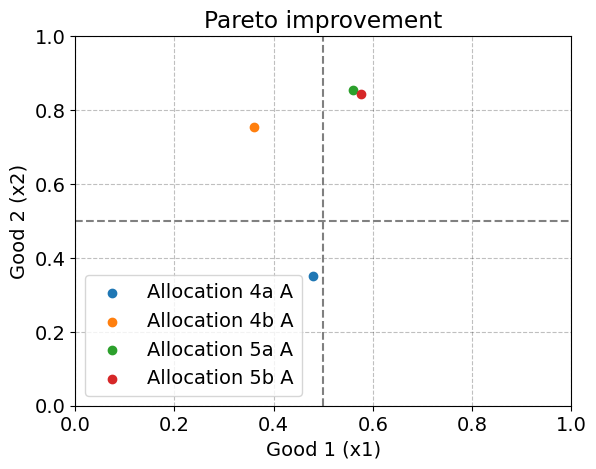

In [844]:

import matplotlib.pyplot as plt

# Define total amounts of each good
total_x1 = 1
total_x2 = 1

# Define allocations for Consumer A from each task
allocations = {
    'Allocation 4a': (xA1_optimal4a, xA2_optimal4a),
    'Allocation 4b': (optimal_xA1_4b, optimal_xA2_4b),
    'Allocation 5a': (x_A1_C, x_A2_C),
    'Allocation 5b': (optimal_xA1_5b, optimal_xA2_5b)
}

# Initialize plot
fig, ax = plt.subplots()

# Plot the allocations for Consumer A
for task, (xA1, xA2) in allocations.items():
    # Compute corresponding allocations for Consumer B
    xB1 = total_x1 - xA1
    xB2 = total_x2 - xA2
    ax.scatter(xA1, xA2, label=f'{task} A', marker='o')  # Mark Consumer A's allocation

# Set plot limits and labels
ax.set_xlim(0, total_x1)
ax.set_ylim(0, total_x2)
ax.set_xlabel('Good 1 (x1)')
ax.set_ylabel('Good 2 (x2)')
ax.axhline(0.5, color='gray', linestyle='--')
ax.axvline(0.5, color='gray', linestyle='--')
ax.set_title('Pareto improvement')

# Add a legend
ax.legend()

# Show the plot
plt.show()

# Question 7

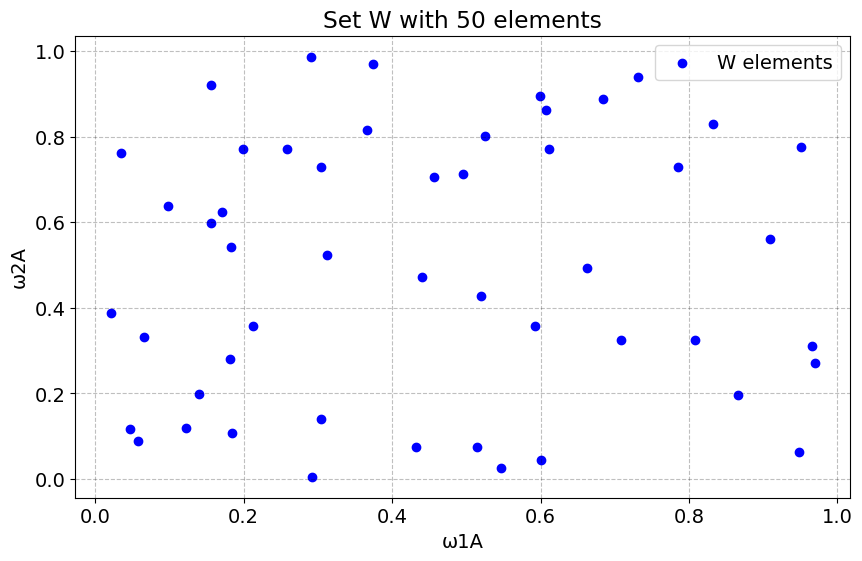

In [845]:
# Set seed for reproducibility
np.random.seed(42)

# Generate 50 random elements for W
omega_1A = np.random.uniform(0, 1, 50)
omega_2A = np.random.uniform(0, 1, 50)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(omega_1A, omega_2A, c='blue', label='W elements')
plt.title('Set W with 50 elements')
plt.xlabel('ω1A')
plt.ylabel('ω2A')
plt.grid(True)
plt.legend()
plt.show()


# Question 8


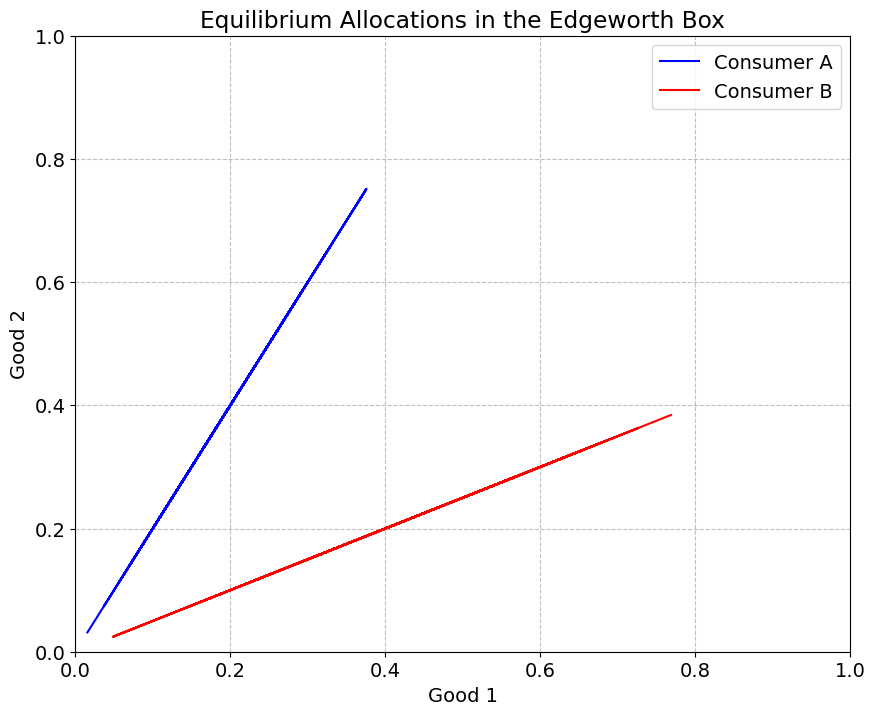

In [846]:
from scipy.optimize import minimize_scalar

# Set the seed for reproducibility
np.random.seed(42)

# Generate 50 pairs of (ω1A, ω2A) from a uniform distribution U(0, 1)
W = np.random.uniform(low=0, high=1, size=(50, 2))

# Parameters
alpha = 1/3
beta = 2/3

# Define utility functions
def uA(x1, x2):
    return x1**alpha * x2**(1-alpha)

def uB(x1, x2):
    return x1**beta * x2**(1-beta)

# Define demand functions for a given price p1 and endowments ω
def demand_A(p1, omega_A):
    omega_1A, omega_2A = omega_A
    xA1 = alpha * (omega_1A + omega_2A / p1)
    xA2 = (1-alpha) * (omega_1A + omega_2A / p1)
    return xA1, xA2

def demand_B(p1, omega_A):
    omega_1A, omega_2A = omega_A
    omega_1B = 1 - omega_1A
    omega_2B = 1 - omega_2A
    xB1 = beta * (omega_1B + omega_2B / p1)
    xB2 = (1-beta) * (omega_1B + omega_2B / p1)
    return xB1, xB2

# Objective function for consumer A's utility maximization, given p1 and ωA
def objective_A(p1, omega_A):
    _, omega_2A = omega_A
    xB1, xB2 = demand_B(p1, omega_A)
    # Consumer A's utility, given they choose price p1
    return -uA(1-xB1, 1-xB2)  # Negative because we minimize

# Market equilibrium allocations for each ωA in W
equilibrium_allocations = []

for omega_A in W:
    # Find the market clearing price p1 that maximizes consumer A's utility
    res = minimize_scalar(objective_A, bounds=(0.01, 5), args=(omega_A,), method='bounded')
    p1_opt = res.x
    xA1, xA2 = demand_A(p1_opt, omega_A)
    xB1, xB2 = demand_B(p1_opt, omega_A)
    equilibrium_allocations.append(((xA1, xA2), (xB1, xB2), p1_opt))

# Prepare the data for plotting in the Edgeworth box
xA1_allocations = [alloc[0][0] for alloc in equilibrium_allocations]
xA2_allocations = [alloc[0][1] for alloc in equilibrium_allocations]
xB1_allocations = [alloc[1][0] for alloc in equilibrium_allocations]
xB2_allocations = [alloc[1][1] for alloc in equilibrium_allocations]

# Plot the Edgeworth box with equilibrium allocations
plt.figure(figsize=(10, 8))
plt.plot(xA1_allocations, xA2_allocations, color='blue', label='Consumer A')
plt.plot(xB1_allocations, xB2_allocations, color='red', label='Consumer B')
plt.title('Equilibrium Allocations in the Edgeworth Box')
plt.xlabel('Good 1')
plt.ylabel('Good 2')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.legend()
plt.grid(True)
plt.show()
